# Practica 3
## Arquitecturas y aplicaciones
### Ejercicio 1.2 Clasificacion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def bias_add(V):
    bias = -np.ones( (len(V),1) )
    return np.concatenate( (V,bias), axis=1)

def bias_sub(V):
    return V[:,:-1] # Saco la ultima columna

def softmax(x): # Toma un vector
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

def softmax_derivative(x):
    s = softmax(x)
    jacobian = np.diag(s)
    for i in range(len(jacobian)):
        for j in range(len(jacobian)):
            if i != j:
                jacobian[i, j] = -s[i] * s[j]
    return jacobian

def sigmoid(x):
    res = 1 / ( 1 + np.exp(-x) )
    return res

In [2]:
def activation(X,S,W): 
    
    Y = [] # L capas Y_o, Y_1, Y_2, .... Y_l-1
    i = 0
    P = len(X)
    for s in S: 
        if i == len(S)-1:
            Y.append( np.zeros((P,s)) )
            i += 1
        else:
            Y.append( np.zeros((P,s+1)) )
            i += 1
        
    Y[0][:] = bias_add(X)
    
    for k in range(1,len(S)-1):
        Y[k][:] = bias_add( sigmoid( np.dot(Y[k-1],W[k]) ) )
        
    Y[-1][:] = softmax( np.dot(Y[-2],W[-1]) ) # Capa de salida
    return Y  

In [18]:
def correction(Y,Z,S,W):
    delta_W = [0] # primer elemento vacio
    
    for i in range(1,len(S)): # S contiene los size de las capas
        delta_W.append( np.zeros( (S[i-1]+1,S[i]) ) )
        
    L = len(S) 
    E = [0]*L # size L 
    D = [0]*L # size L
    d = [0]*L # size L
    
    E[L-1] = Z - Y[-1]
    d[L-1] = softmax_derivative(Y[-1]) 
    D[L-1] = E[-1]*d[-1] 
        
    for k in reversed(np.arange(1,L)):
        delta_W[k] = lr * np.dot( Y[k-1].T, D[k]) # lr = learning rate (variable global)
        E[k] = np.dot( D[k], W[k].T )
        d[k] = sigmoid( Y[k-1] ) * ( 1 - sigmoid(Y[k-1] ) )
        D[k-1] = ( bias_sub( E[k]*d[k] ) )
    return delta_W

In [4]:
def adaptation(S,W,delta_W):
  L = len(S) 
  for k in range(1,L-1):
    W[k] += delta_W[k]
  return W

In [5]:
def cross_entropy_loss(y_hat, y_true):
  
    # if y_hat.ndim == 2 and y_hat.shape[1] == 1:
    #     y_hat = y_hat.reshape(-1)  # reshape to 1D array
    # if y_true.ndim == 1:
    #     y_true = y_true[:, np.newaxis]  # add new axis

    n_samples = y_hat.shape[0]
    loss = -np.sum(y_true * np.log(y_hat)) / n_samples
    return loss

In [7]:
def train(X, Z, S, W, lr, eps, epoch):

  error = 1
  iter = 0
  errores = []
  while error > eps and iter < epoch:

    Y = activation(X,S,W)
    delta_w = correction(Y,Z,S,W)
    W = adaptation(S,W,delta_w)
    error = cross_entropy_loss(Y[-1],Z)

    errores.append(error)
    iter += 1

  return errores

In [8]:
datos_clasif_4 = pd.read_csv('/content/p13_ej4_classif.csv', header = None ) # Ultima columna son los datos objetivo. Los otros de entrada

In [9]:
datos_clasif_4.head()

,0,1,2
0,-0.056240,0.336536,1
1,0.093222,0.138700,1
2,2.242435,3.008840,2
3,0.005527,-0.138740,1
4,-2.143559,2.439455,2


In [10]:
datos_clasif_4[2].unique() # 3 clases --> 1 | 2 | 3

array([1, 2, 3])

In [11]:
X = np.concatenate( ( np.array(datos_clasif_4[0]).reshape(-1,1), np.array(datos_clasif_4[1]).reshape(-1,1) ), axis =1 )
Z = np.array(datos_clasif_4[2]).reshape(-1,1)
Z = Z - 1

print(X.shape)
print(Z.shape)

(999, 2)
(999, 1)


Ultimo error:  6.937711306673371


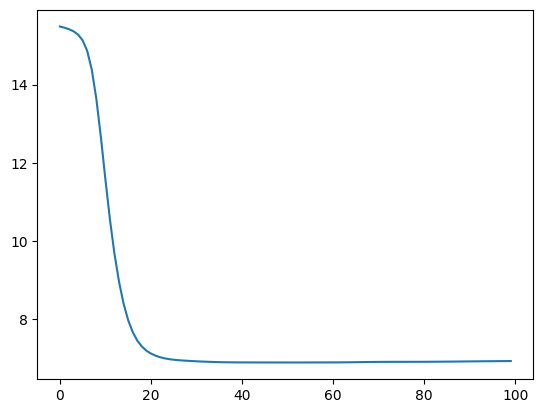

In [38]:
# Defino S y W
# Los elementos del medio de S representan las dimensiones (columnas) de la capa oculta

S = [len(X[0]),20,7,len(Z[0])]
W = [0]
lr = 0.05

np.random.seed(10)
for i in range(0,len(S)-1):
  w_i = np.random.uniform( 1, 3, (S[i]+1,S[i+1]) )
  W.append(w_i)

errs = train(X, Z, S, W, lr, 1e-3, 100)
print('Ultimo error: ',errs[-1])
plt.plot(errs)
plt.show()